<a href="https://colab.research.google.com/github/Dileep2896/Deep-Learning/blob/main/RNN%20(LSTM)%20Predicting%20The%20Open%20Google%20Stock%20Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN (LSTM) - Predicting The Open Google Stock Price

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1 - Data Preprocessing

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a data structure with 60 timesteps and 1 output

In [6]:
X_train = []
y_train = []
lap = 60
for i in range(lap, 1258):
  X_train.append(training_set_scaled[i-lap:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [8]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [9]:
X_train.shape

(1198, 60)

In [10]:
y_train.shape

(1198,)

### Reshaping the data

In [12]:
X_train.shape[0], X_train.shape[1]

(1198, 60)

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

## Part 2 - Building the RNN

### Importing the keras libraries and packages

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [16]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [18]:
regressor.add(LSTM(units = 50,
                   return_sequences = True,
                   input_shape = (X_train.shape[1], 1)
                   ))
regressor.add(Dropout(0.2))

### Adding the second LSTM layer and some Dropout regularisation

In [19]:
regressor.add(LSTM(units = 50,
                   return_sequences = True
                   ))
regressor.add(Dropout(0.2))

### Adding the third LSTM layer and some Dropout regularisation

In [20]:
regressor.add(LSTM(units = 50,
                   return_sequences = True
                   ))
regressor.add(Dropout(0.2))

### Adding the fourth LSTM layer and some Dropout regularisation

In [21]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [22]:
regressor.add(Dense(1))

In [23]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                2

### Compiling the RNN

In [24]:
regressor.compile(optimizer = 'adam',
                  loss = 'mse')

### Fitting the RNN to trainig set

In [25]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 11s 116ms/step - loss: 0.0308
Epoch 2/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0062
Epoch 5/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0059
Epoch 6/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0055
Epoch 9/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0039
Epoch 13/100

## Part 3 - Making the prediction and visualising the results

### Getting the real stock price of 2017

In [26]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [27]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [28]:
real_stock_price.shape

(20, 1)

### Getting the predicted stock price of 2017

In [32]:
dataset_test['Open']

0     778.81
1     788.36
2     786.08
3     795.26
4     806.40
5     807.86
6     805.00
7     807.14
8     807.48
9     807.08
10    805.81
11    805.12
12    806.91
13    807.25
14    822.30
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, dtype: float64

In [29]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [31]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [30]:
inputs.shape

(80,)

In [33]:
inputs = inputs.reshape(-1, 1)

In [34]:
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [35]:
inputs.shape

(80, 1)

In [36]:
inputs = sc.transform(inputs)

In [37]:
X_test = []
lap = 60
for i in range(lap, 80):
  X_test.append(inputs[i-lap:i, 0])
X_test = np.array(X_test)

In [38]:
X_test

array([[0.9299055 , 0.93113327, 0.92750577, ..., 0.95725128, 0.93796041,
        0.93688146],
       [0.93113327, 0.92750577, 0.94415507, ..., 0.93796041, 0.93688146,
        0.92955205],
       [0.92750577, 0.94415507, 0.93876032, ..., 0.93688146, 0.92955205,
        0.94731751],
       ...,
       [0.96054394, 0.9371419 , 0.92841729, ..., 1.01045465, 1.02407173,
        1.03930724],
       [0.9371419 , 0.92841729, 0.90804747, ..., 1.02407173, 1.03930724,
        1.03354044],
       [0.92841729, 0.90804747, 0.8771858 , ..., 1.03930724, 1.03354044,
        0.99624228]])

In [40]:
X_test.shape

(20, 60)

In [41]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [42]:
X_test.shape

(20, 60, 1)

Predicting the stock prices using the X_test

In [43]:
predicted_stock_price = regressor.predict(X_test)

In [44]:
predicted_stock_price

array([[0.93437624],
       [0.9289895 ],
       [0.93030816],
       [0.93323284],
       [0.9395152 ],
       [0.9501676 ],
       [0.9586779 ],
       [0.96051985],
       [0.9598448 ],
       [0.9593784 ],
       [0.959848  ],
       [0.96057296],
       [0.96127516],
       [0.96303296],
       [0.9650541 ],
       [0.97435284],
       [0.98710775],
       [0.9997172 ],
       [1.0046895 ],
       [0.99378073]], dtype=float32)

Inverse the predicted_stock_price

In [45]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [46]:
predicted_stock_price

array([[781.40326],
       [778.50757],
       [779.2165 ],
       [780.78864],
       [784.1658 ],
       [789.8921 ],
       [794.46686],
       [795.45703],
       [795.0942 ],
       [794.84344],
       [795.0959 ],
       [795.4856 ],
       [795.8631 ],
       [796.808  ],
       [797.8945 ],
       [802.89307],
       [809.74963],
       [816.52795],
       [819.20087],
       [813.33673]], dtype=float32)

### Visualising the results

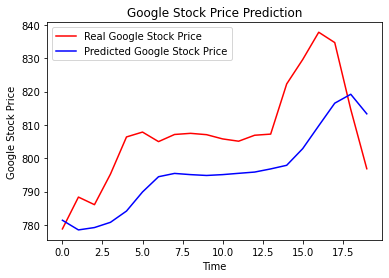

In [47]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()